In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import collections as col

In [2]:
results = pd.read_csv("./output/unsmoothed/average_metrics.csv")

In [3]:
results.head()

,model,horizon,location,MSE,MAE,Coverage 95%PI,WIS
0,SW-Ensemble(2),1,China,238.93,10.87,93.55,0.92
1,SW-Ensemble(3),1,China,1278.10,14.96,100.00,0.94
2,SW-Ensemble(4),1,China,235.80,10.53,100.00,0.90
3,SW-topRanked(1),1,China,198.49,10.23,80.65,0.85
4,SW-topRanked(2),1,China,2637.51,24.30,70.97,1.25


In [4]:
print(results["WIS"].min(), results["WIS"].max())

-0.26 5.06


In [13]:
def plot_metric(df, metric):
    locations = df['location'].unique()
    horizons = df['horizon'].unique()

    num_locations = len(locations)
    num_horizons = len(horizons)

    bad_color = "#d95f02"
    good_color = "#1b9e77"
    
    fig, axes = plt.subplots(num_locations, num_horizons, figsize=(4*num_horizons, num_locations * 5))
    
    for i, location in enumerate(locations):
        for j, horizon in enumerate(horizons):
            ax = axes[i, j]
            subset = df[(df['location'] == location) & (df['horizon'] == horizon)]
            subset = subset.reset_index(drop=True)
            base = 0
            if metric == "WIS":
                subset[metric] += 1
            # if subset[metric].min() <= 0:
            #     base = -1
            #     subset[metric] += 1
            # else:
            #     base = 0
            # print(subset)
            max_idx = subset[metric].idxmax()
            min_idx = subset[metric].idxmin()
            # print(min_idx, max_idx)
            
            sns.barplot(x=metric, y='model', data=subset, ax=ax, orient='h', color="#7570b3", left=base)
            # bars = ax.barh(subset['model'], subset[metric], color="#005bbb", left=base)
            # print(ax.patches[0])
            if metric == "Coverage 95%PI":
                indexes = subset.loc[subset[metric] == subset[metric].max()].index
                for idx in indexes:
                    ax.patches[idx].set_facecolor(good_color)
                ax.patches[min_idx].set_facecolor(bad_color)
            else:
                ax.patches[max_idx].set_facecolor(bad_color)
                ax.patches[min_idx].set_facecolor(good_color)
            ax.set_title(f'{location} | horizon: {horizon}', fontsize=14)
            ax.set_xlabel(ax.get_xlabel(), fontsize=12)
            ax.set_ylabel(ax.get_ylabel(), fontsize=12)
            ax.tick_params(axis='both', which='major', labelsize=12)

            # print(f'location: {location} | horizon: {horizon}')
            # print(subset[metric])
            # print(subset[metric].max() + 0.1)
            ax.set_xlim(base, subset[metric].max() + base + 0.1)
            # ax.set_xlim(min(0, subset[metric].min()), subset[metric].max() + 0.1)

            for spine in ax.spines.values():
                spine.set_visible(False)

    # fig.suptitle(metric, fontsize=16)
    plt.tight_layout()
    # plt.subplots_adjust(top=0.9, bottom=0.1, left=0.1, right=0.8, hspace=0.4, wspace=0.4)
    plt.margins(0.1)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    metric = metric.replace(" ", "_").replace("%", "")
    plt.savefig(f"./output/unsmoothed/{metric}_bar_plot.pdf", format='pdf')
    plt.show()

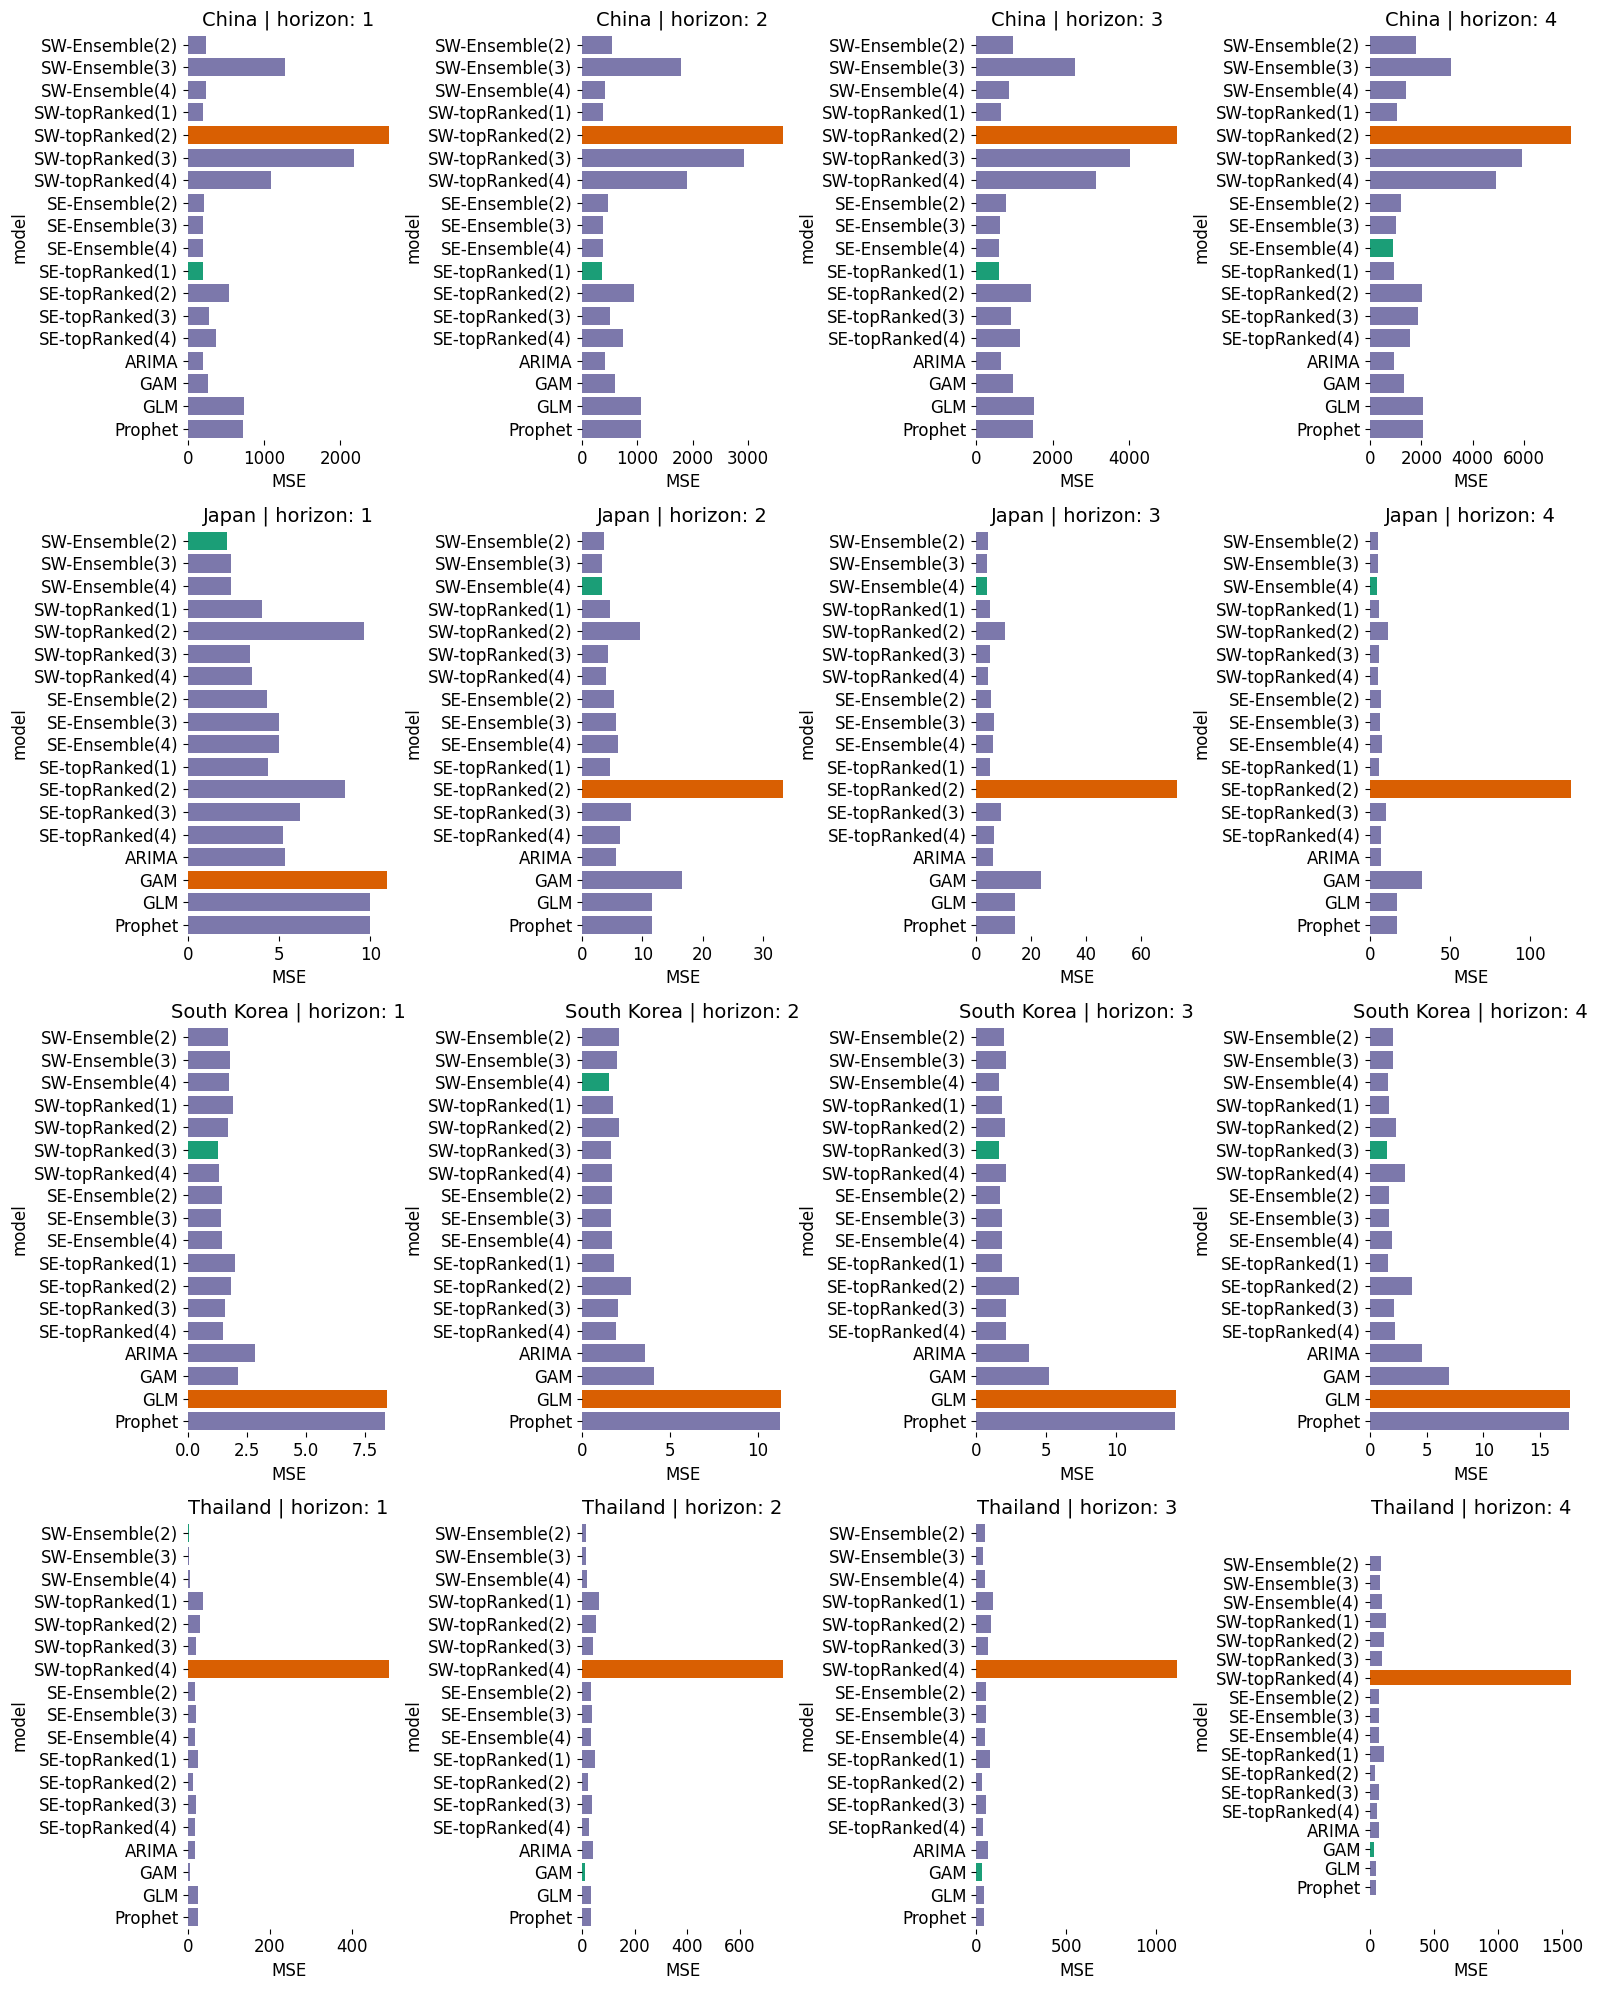

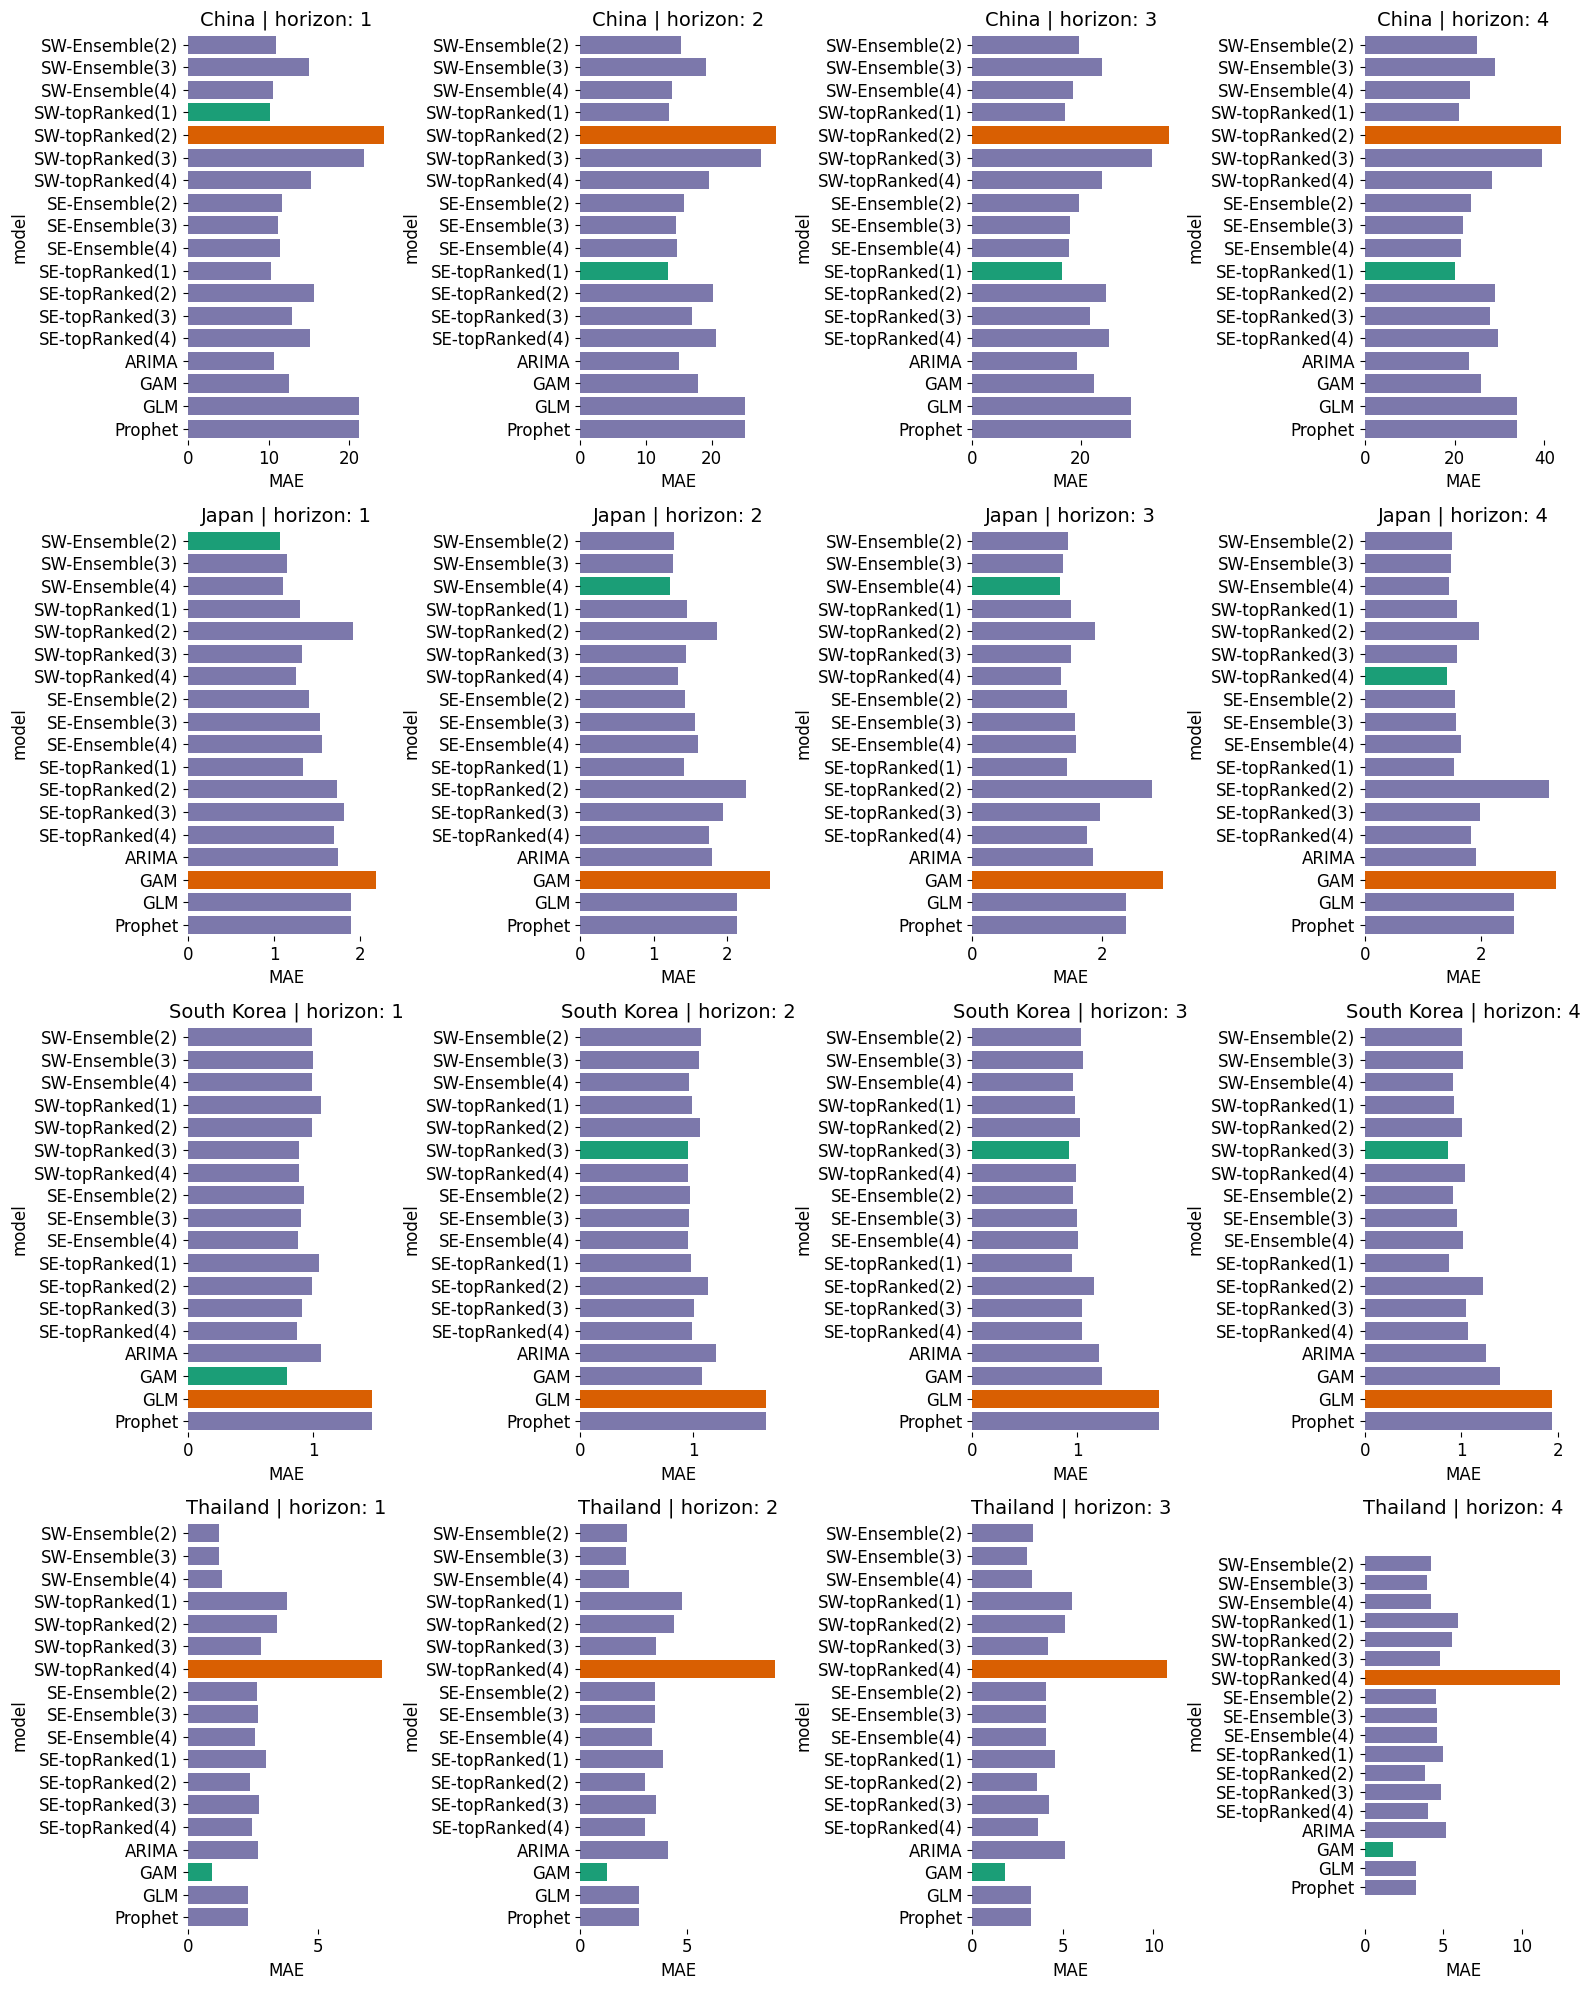

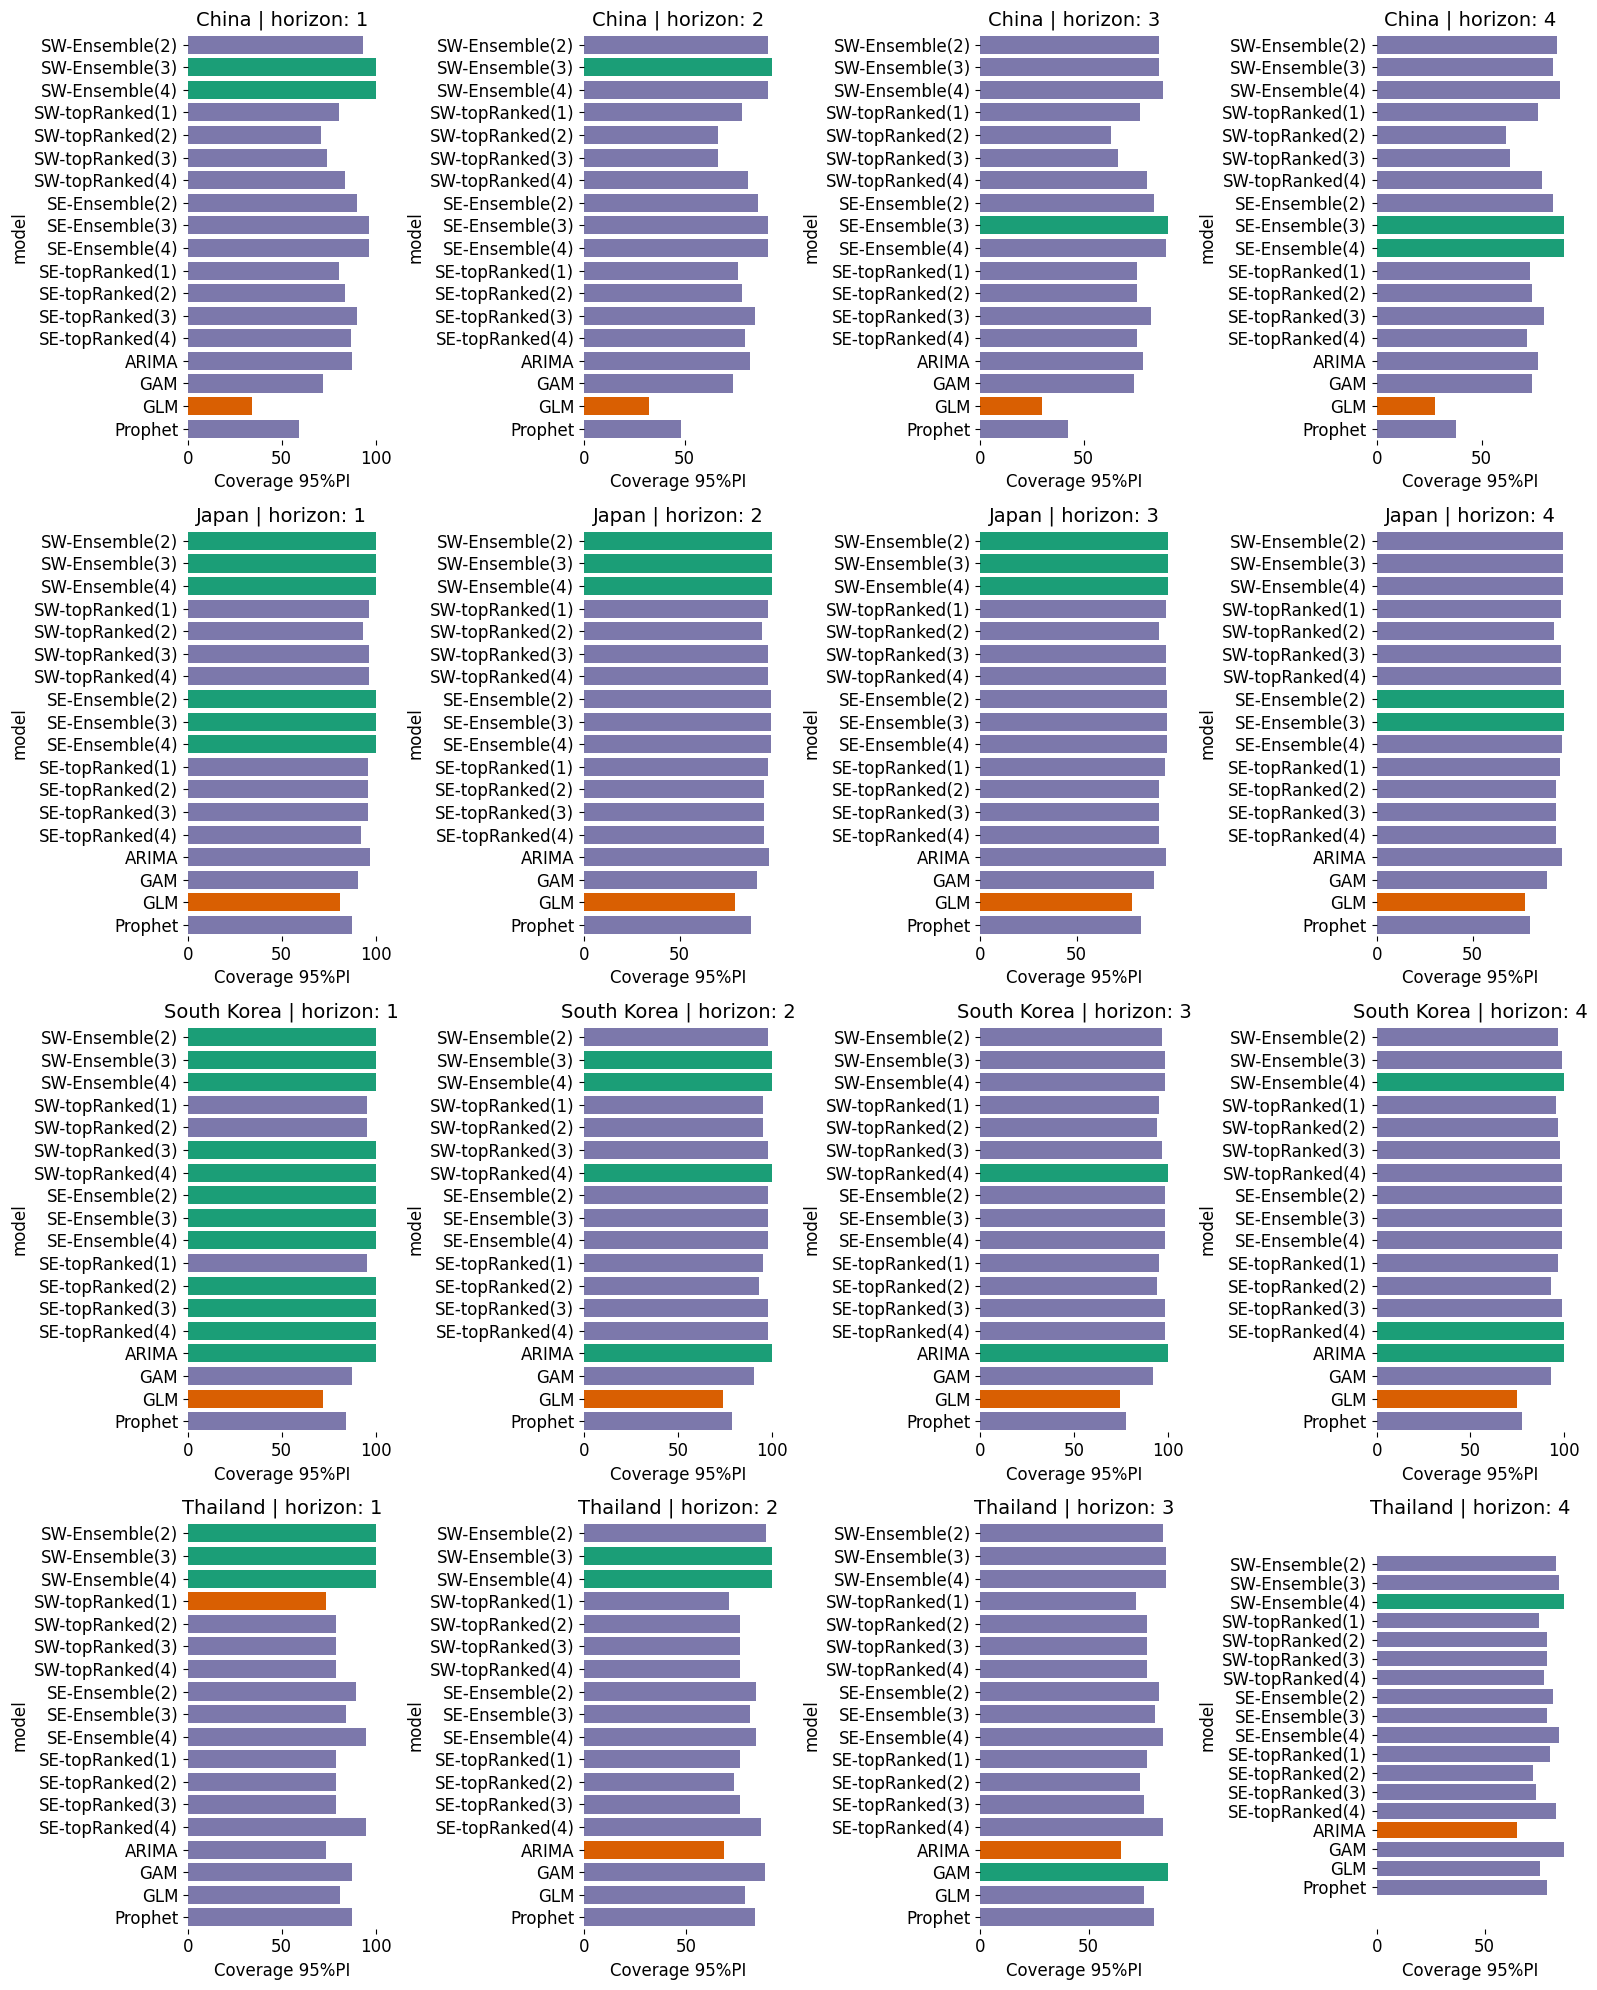

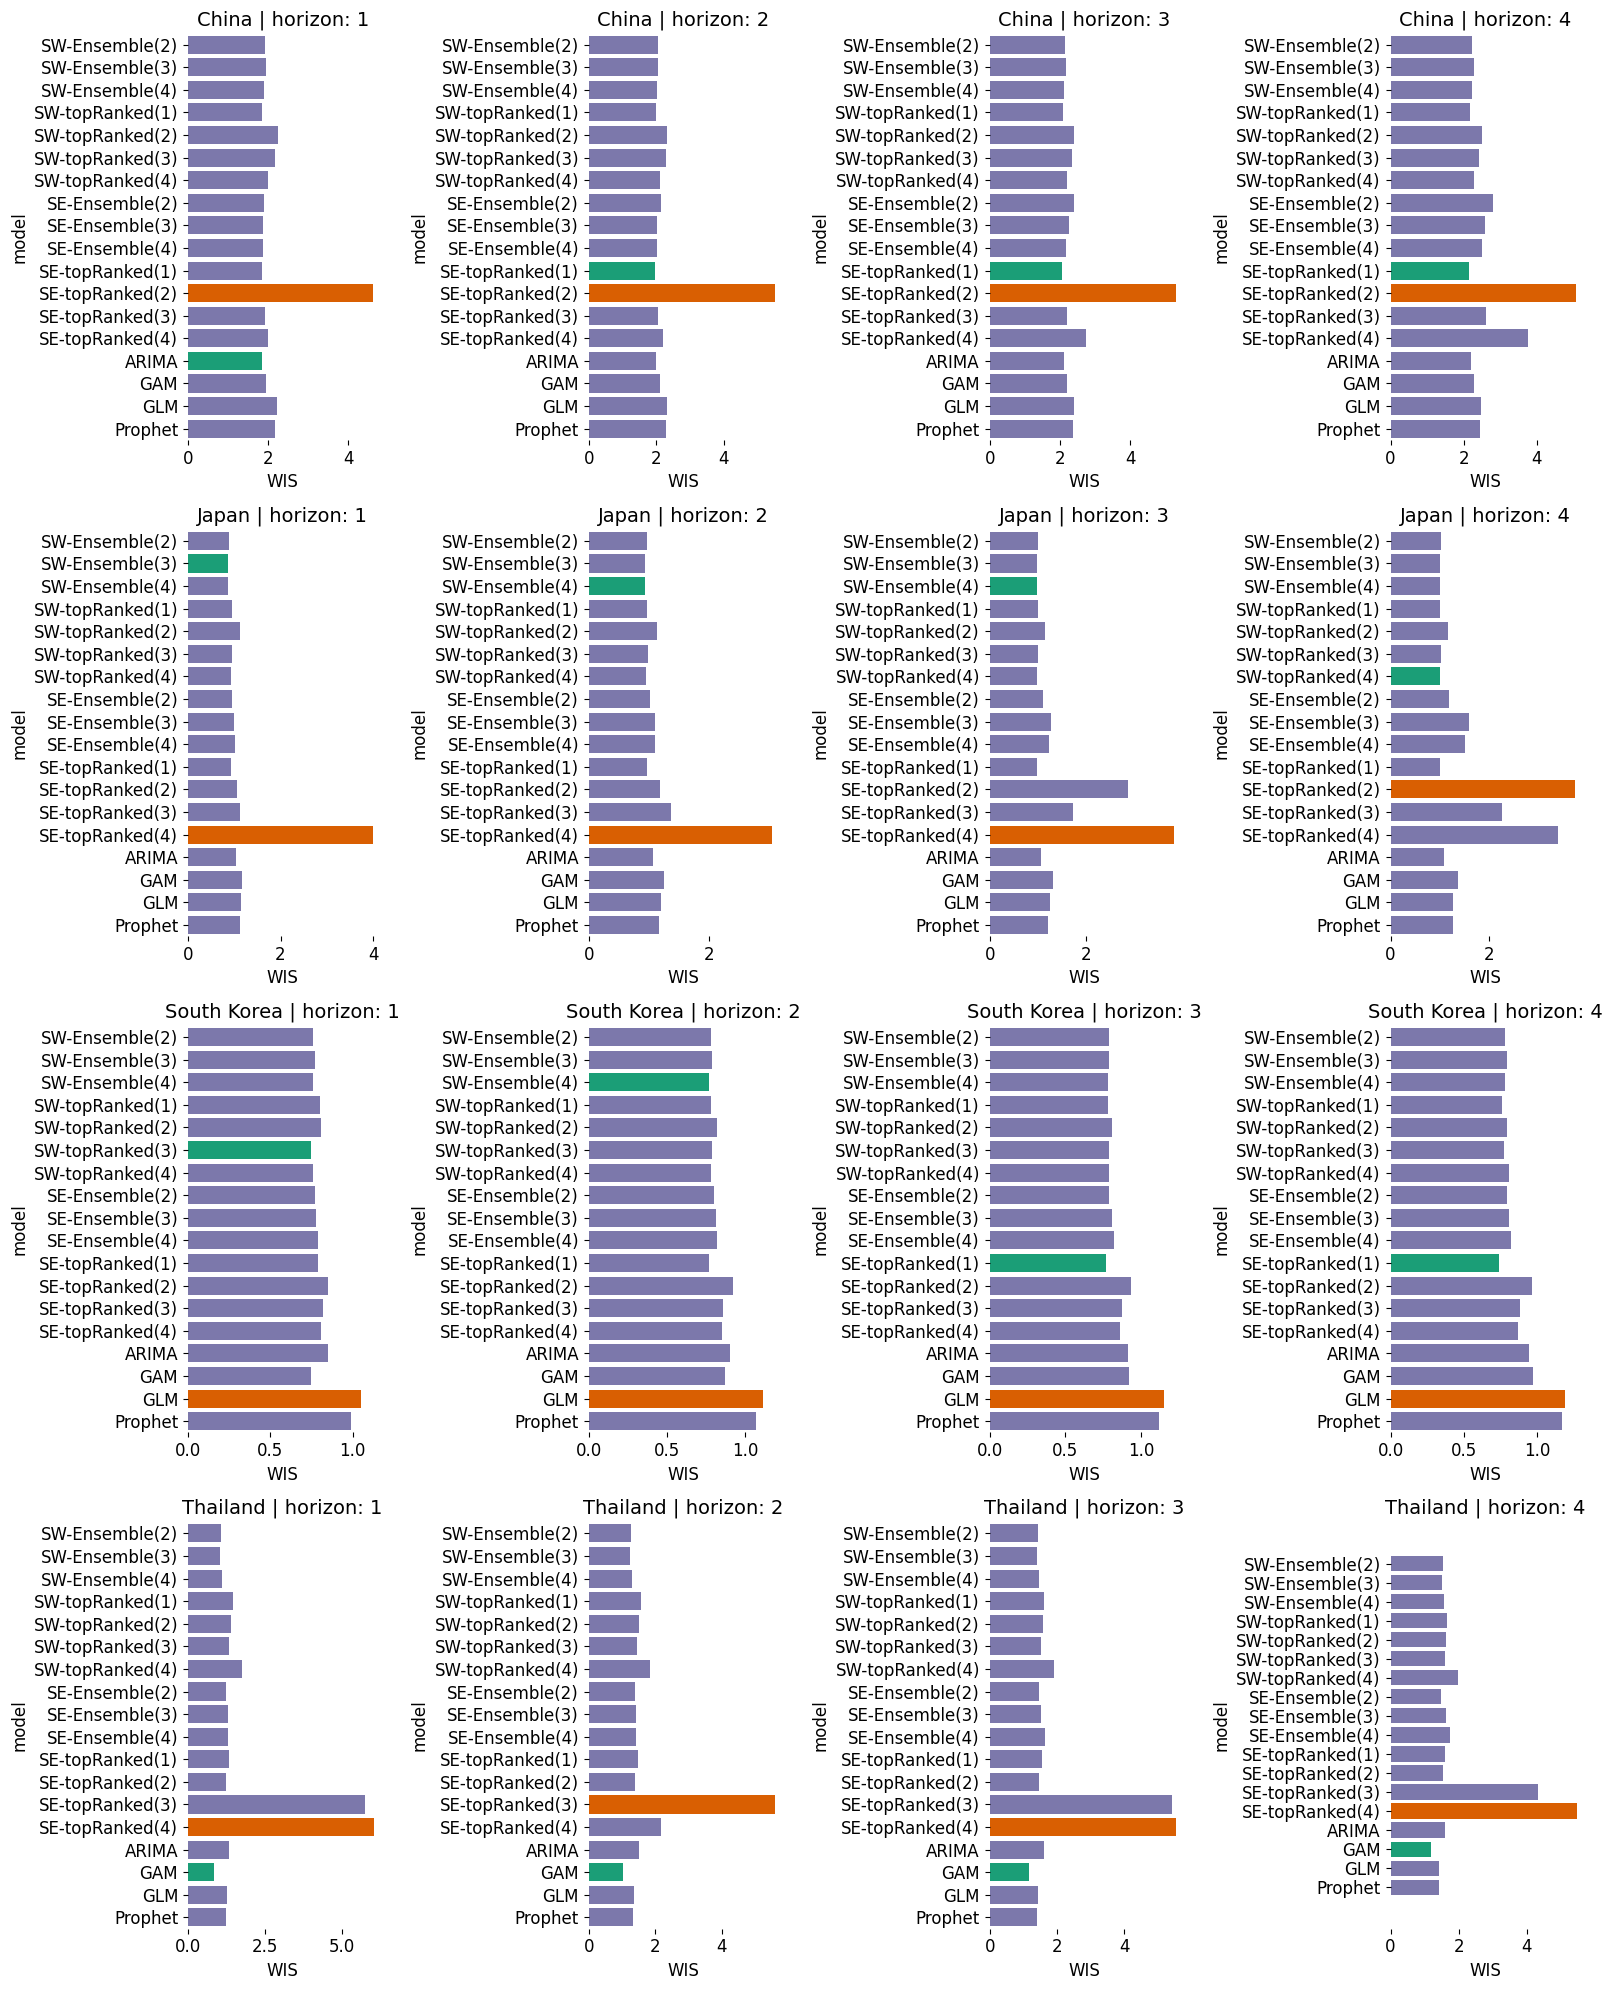

In [14]:
for metric in results.columns[3:]:
    plot_metric(results, metric)